# Projet de Machine Learning - M2 BIDABI

Ce projet vise à développer un modèle de classification capable de déterminer le sentiment d’un tweet, qu’il soit positif ou négatif, en utilisant le jeu de données Sentiment140, disponible sur Kaggle. 

### Chargement des librairies

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Traitement de texte
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc



### 1. Chargement des données

Dans ce projet, nous utilisons le jeu de données Sentiment140 disponible sur Kaggle, qui contient 1,6 million de tweets étiquetés avec des sentiments positifs ou négatifs.

In [2]:
import pandas as pd

df = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None,
                 names=["sentiment", "ids", "date", "flag", "user", "text"], encoding='latin1')

df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.shape

(1600000, 6)

In [4]:
# nltk.download('stopwords')
# nltk.download('wordnet')

In [5]:
# Sélection d’un échantillon
df = df.sample(n=80000, random_state=42).reset_index(drop=True)

### 2. Prétraitement des données

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))  # Vous pouvez ajouter des mots spécifiques si besoin
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    # Convertir en minuscules
    tweet = tweet.lower()
    # Retirer les URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    # Retirer les mentions & hashtag
    tweet = re.sub(r'@\w+|#', '', tweet)
    # Retirer la ponctuation et les chiffres
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    # Tokenisation
    tokens = tweet.split()
    # Suppression des stopwords + lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Reconstruire la phrase nettoyée
    cleaned_tweet = " ".join(tokens)
    return cleaned_tweet


[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     Une connexion existante a dû être fermée par l’hôte
[nltk_data]     distant>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] Une
[nltk_data]     connexion existante a dû être fermée par l’hôte
[nltk_data]     distant>


In [7]:
df['clean_text'] = df['text'].apply(clean_tweet)

In [8]:
df.head()

,sentiment,ids,date,flag,user,text,clean_text
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet apps razr
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,know family drama lamehey next time u hang kim...
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,school email wont open geography stuff revise ...
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airway problem


In [9]:
df['sentiment'].describe()

count    80000.000000
mean         2.000050
std          2.000012
min          0.000000
25%          0.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: sentiment, dtype: float64

In [10]:
df['sentiment'].nunique()

2

In [11]:
df['sentiment'].replace(4, 1, inplace=True) 

C:\Users\gueye\AppData\Local\Temp\ipykernel_29724\4253677064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace(4, 1, inplace=True)


In [12]:
df['sentiment'].describe()

count    80000.000000
mean         0.500012
std          0.500003
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64

In [13]:
# Exemples de tweets
print("\nExemples de tweets positifs :")
print(df[df['sentiment'] == 1]['clean_text'].head(5))


Exemples de tweets positifs :
6                                      lunchdj come eat
9     thank glad like product review bit site enjoy ...
10               zach make pee sitting im grown gay man
11                            sum day one word kackered
12                               great mind think alike
Name: clean_text, dtype: object


In [14]:
print("\nExemples de tweets négatifs :")
print(df[df['sentiment'] == 0]['clean_text'].head(5))


Exemples de tweets négatifs :
0                                         ahhh hope ok
1                                 cool tweet apps razr
2    know family drama lamehey next time u hang kim...
3    school email wont open geography stuff revise ...
4                                 upper airway problem
Name: clean_text, dtype: object


####  WordCloud Pour comprendre le vocabulaire utilisé dans les tweets.

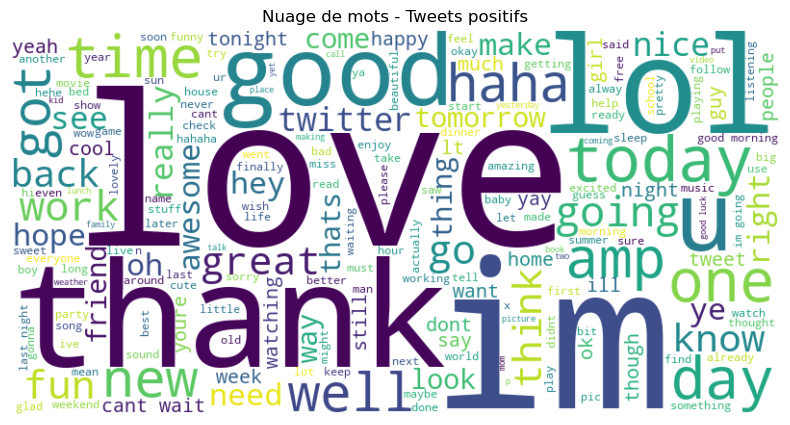

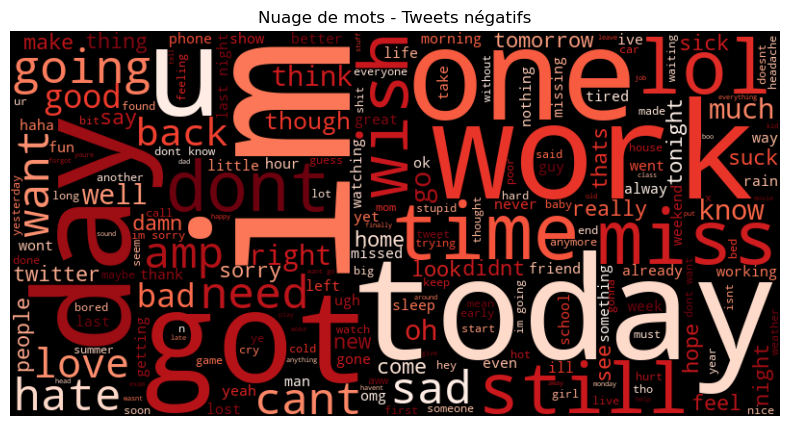

In [52]:
from wordcloud import WordCloud

# Tweets positifs
positive_text = " ".join(df[df["sentiment"] == 1]["clean_text"])
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - Tweets positifs")
plt.show()

# Tweets négatifs
negative_text = " ".join(df[df["sentiment"] == 0]["clean_text"])
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - Tweets négatifs")
plt.show()


### 3. Modélisation

##### 3.1. Split en données d’entraînement et de test

In [15]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
)


##### 3.2. Transformation en vecteurs

In [16]:
#  TF-IDF

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


##### 3.3. Modèle de regression logistique

In [17]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
# Prédictions
y_pred_logistic = logistic_model.predict(X_test_tfidf)

In [19]:
# Calcul des métriques
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Affichage des résultats
print("Logistic Regression - Performances :")
print(f"Accuracy : {accuracy_logistic:.2f}")
print(f"Precision : {precision_logistic:.2f}")
print(f"Recall : {recall_logistic:.2f}")
print(f"F1-Score : {f1_logistic:.2f}\n")

Logistic Regression - Performances :
Accuracy : 0.77
Precision : 0.76
Recall : 0.78
F1-Score : 0.77



In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],  # Paramètre de régularisation
    'max_iter': [100, 200, 500]  # Nombre d'itérations pour la convergence
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)
print(f"Meilleurs paramètres : {grid_search.best_params_}")


Meilleurs paramètres : {'C': 1, 'max_iter': 100}


In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"Scores de cross-validation : {scores}")
print(f"Score moyen : {scores.mean()}")


Scores de cross-validation : [0.76765625 0.76132813 0.76015625 0.76734375 0.76609375]
Score moyen : 0.764515625


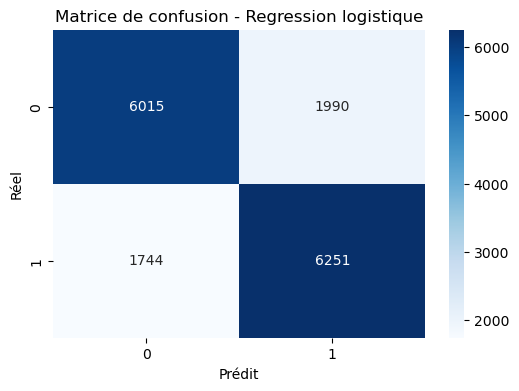

In [22]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matrice de confusion - Regression logistique')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [23]:
# Exemples de tweets pour test
test_tweets = [
    "I love the new design of the website! Great job 👏", 
    "This is the worst service I have ever experienced. I'm so disappointed.",
    "Not bad at all, but could have been better.",
    "I am so happy with my purchase! Highly recommend it.",
    "Terrible experience. I will never come back here again."
]

# Prédictions pour Logistic Regression
print("\nPrédictions avec Logistic Regression (textes bruts) :\n")
for tweet in test_tweets:
    vectorized_tweet = tfidf.transform([tweet])  # Transformation TF-IDF sans nettoyage
    prediction = logistic_model.predict(vectorized_tweet)  # Prédiction
    sentiment = "Positif" if prediction[0] == 1 else "Négatif"
    print(f"Tweet : {tweet}\nSentiment prédit : {sentiment}\n")


Prédictions avec Logistic Regression (textes bruts) :

Tweet : I love the new design of the website! Great job 👏
Sentiment prédit : Positif

Tweet : This is the worst service I have ever experienced. I'm so disappointed.
Sentiment prédit : Négatif

Tweet : Not bad at all, but could have been better.
Sentiment prédit : Négatif

Tweet : I am so happy with my purchase! Highly recommend it.
Sentiment prédit : Positif

Tweet : Terrible experience. I will never come back here again.
Sentiment prédit : Négatif



In [24]:
# Comparer les étiquettes réelles avec les prédictions
incorrect_predictions = X_test[y_pred_logistic != y_test]
incorrect_labels = y_test[y_pred_logistic != y_test]
incorrect_texts = df.iloc[incorrect_predictions.index]['clean_text']  # Afficher les tweets mal classifiés

# Les étiquettes réelles et les prédictions
incorrect_results = pd.DataFrame({
    'Tweet': incorrect_texts,
    'Vérité': incorrect_labels,
    'Prédiction': y_pred_logistic[y_pred_logistic != y_test]
})

# Afficher les erreurs
print(incorrect_results.head(10))  # Afficher les 5 premières erreurs


                                                   Tweet  Vérité  Prédiction
74783  im going miss youu next yearr better come vall...       1           0
65509  bed school morning gym final tomorrow jogging ...       0           1
39859                                  yeah deserve face       0           1
58834  one month til smoking ban roughly one month si...       1           0
53519  watching rent broadway dvd close im goin get w...       0           1
51037  im going dye hair dark burgundyblack chop long...       1           0
52593  ya pretty boring pretty entertaining wasnt cu ...       0           1
41373                 tired tired thinking going sleep x       1           0
9918                                    news yet working       1           0
29166  give watching conan instead hope nothing overu...       0           1


##### 3.4. Modèle Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

# Entraîner Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [26]:
# Prédictions
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)

In [36]:
# Calcul des métriques
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Affichage des résultats
print("Naive Bayes - Performances :")
print(f"Accuracy : {accuracy_nb:.2f}")
print(f"Precision : {accuracy_nb:.2f}")
print(f"Recall : {accuracy_nb:.2f}")
print(f"F1-Score : {accuracy_nb:.2f}\n")

Naive Bayes - Performances :
Accuracy : 0.76
Precision : 0.76
Recall : 0.76
F1-Score : 0.76



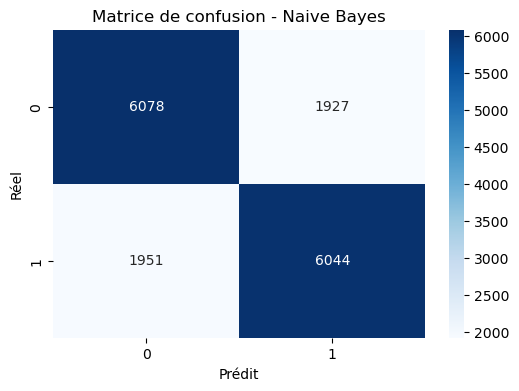

In [37]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matrice de confusion - Naive Bayes')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [29]:
# Prédictions pour les tweets
print("\nPrédictions avec Naive Bayes :")
for tweet in test_tweets:
    vectorized_tweet = tfidf.transform([tweet])
    prediction = naive_bayes_model.predict(vectorized_tweet)
    sentiment = "Positif" if prediction[0] == 1 else "Négatif"
    print(f"Tweet : {tweet}\nSentiment prédit : {sentiment}\n")


Prédictions avec Naive Bayes :
Tweet : I love the new design of the website! Great job 👏
Sentiment prédit : Positif

Tweet : This is the worst service I have ever experienced. I'm so disappointed.
Sentiment prédit : Négatif

Tweet : Not bad at all, but could have been better.
Sentiment prédit : Négatif

Tweet : I am so happy with my purchase! Highly recommend it.
Sentiment prédit : Positif

Tweet : Terrible experience. I will never come back here again.
Sentiment prédit : Négatif



##### 3.5. LinearSVC

In [30]:
from sklearn.svm import LinearSVC

# Entraîner le modèle
linear_svc_model = LinearSVC(max_iter=1000)
linear_svc_model.fit(X_train_tfidf, y_train)

c:\Users\gueye\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [31]:
# Prédictions
y_pred_svc = linear_svc_model.predict(X_test_tfidf)

In [32]:
# Calcul des métriques
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

# Affichage des résultats
print("Linear SVC - Performances :")
print(f"Accuracy : {accuracy_svc:.2f}")
print(f"Precision : {precision_svc:.2f}")
print(f"Recall : {recall_svc:.2f}")
print(f"F1-Score : {f1_svc:.2f}\n")

Linear SVC - Performances :
Accuracy : 0.75
Precision : 0.75
Recall : 0.76
F1-Score : 0.76



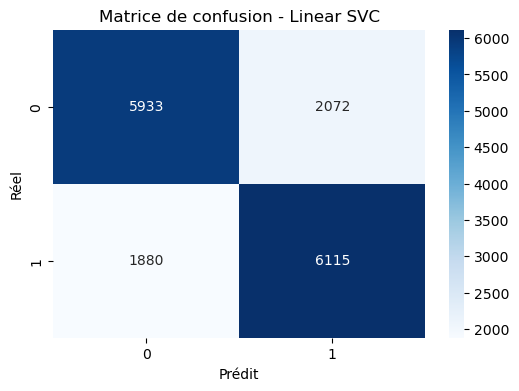

In [38]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Matrice de confusion - Linear SVC')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [39]:
# Créer un DataFrame pour stocker les performances
performance_data = {
    "Modèle": ["Logistic Regression", "Naive Bayes", "Linear SVC"],
    "Accuracy": [accuracy_logistic, accuracy_nb, accuracy_svc],
    "Precision": [precision_logistic, precision_nb, precision_svc],
    "Recall": [recall_logistic, recall_nb, recall_svc],
    "F1-Score": [f1_logistic, f1_nb, f1_svc]
}

performance_df = pd.DataFrame(performance_data)

# Affichage du tableau
print(performance_df)


                Modèle  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.766625   0.758524  0.781864  0.770017
1          Naive Bayes  0.757625   0.758249  0.755972  0.757109
2           Linear SVC  0.753000   0.746916  0.764853  0.755778


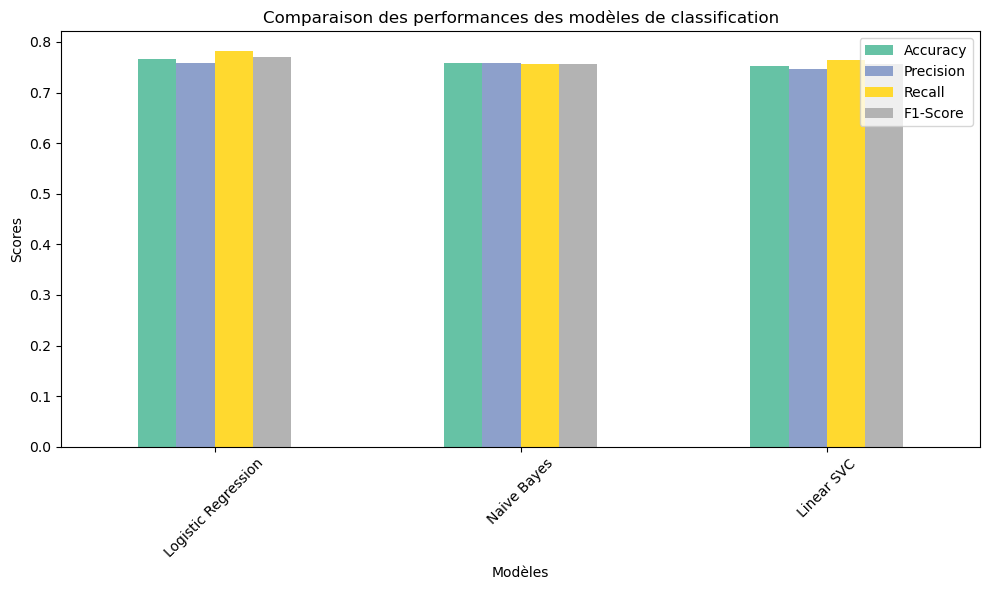

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un DataFrame pour les performances des modèles
performance_data = {
    "Modèle": ["Logistic Regression", "Naive Bayes", "Linear SVC"],
    "Accuracy": [accuracy_logistic, accuracy_nb, accuracy_svc],
    "Precision": [precision_logistic, precision_nb, precision_svc],
    "Recall": [recall_logistic, recall_nb, recall_svc],
    "F1-Score": [f1_logistic, f1_nb, f1_svc]
}

performance_df = pd.DataFrame(performance_data)

# Transformation du DataFrame pour une meilleure gestion
performance_df = performance_df.set_index("Modèle")

# Tracer le graphique
plt.figure(figsize=(10, 6))

# Utilisation de seaborn pour dessiner un graphique à barres
performance_df.plot(kind="bar", ax=plt.gca(), colormap="Set2")

# Ajouter des labels et un titre
plt.title("Comparaison des performances des modèles de classification")
plt.xlabel("Modèles")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.tight_layout()

# Affichage du graphique
plt.show()


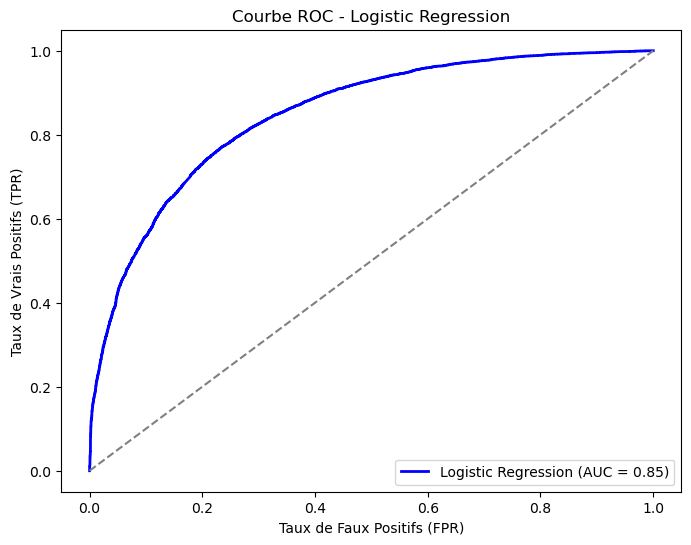

In [47]:
# Prédiction des probabilités
y_scores_logistic = logistic_model.predict_proba(X_test_tfidf)[:, 1]

# Calcul des valeurs ROC
fpr, tpr, _ = roc_curve(y_test, y_scores_logistic)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Ligne de hasard
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


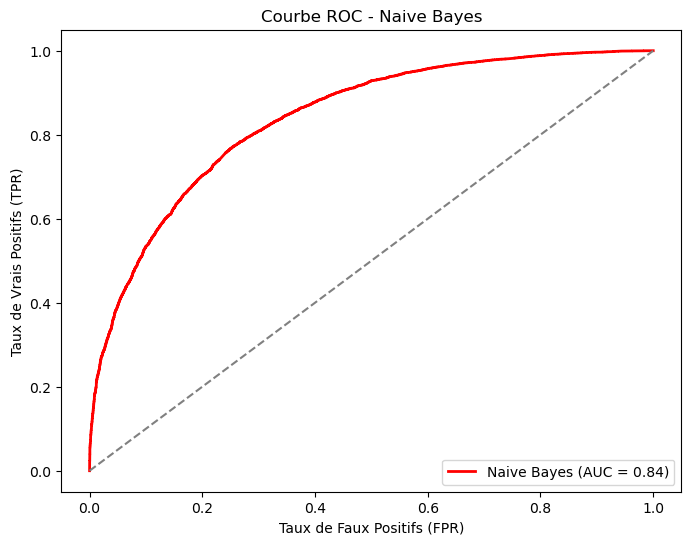

In [48]:
# Prédiction des probabilités
y_scores_nb = naive_bayes_model.predict_proba(X_test_tfidf)[:, 1]

# Calcul des valeurs ROC
fpr, tpr, _ = roc_curve(y_test, y_scores_nb)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Naive Bayes")
plt.legend(loc="lower right")
plt.show()


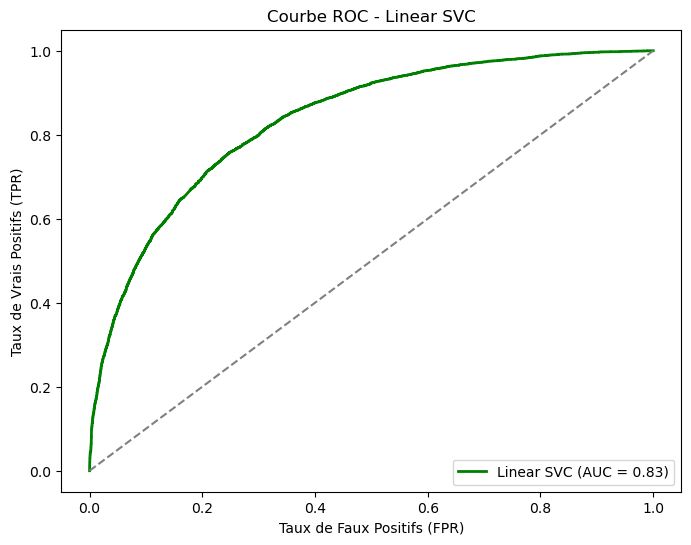

In [49]:
# Prédiction des scores
y_scores_svc = linear_svc_model.decision_function(X_test_tfidf)

# Calcul des valeurs ROC
fpr, tpr, _ = roc_curve(y_test, y_scores_svc)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Linear SVC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Linear SVC")
plt.legend(loc="lower right")
plt.show()
